In [32]:
import numpy as np
import matplotlib.pyplot as plt

#### Initialisierung der Festigkeitsparameter: R_2(+) Zugfestigkeit, R_2(-) Druckfestigkeit und R12 (Schubfestigkeit):  

In [33]:
R2P = 25
R2M = 130
R12 = 45

#### Initialisierung der Interaktionsparameter: p12(+) und p12(-):

In [34]:
P12P = P12M = 0.3

### Bruchmodus A:  

$$
\sqrt{\left(\frac{\tau_{12}}{R_{12}}\right)^{2}+\left(1-p_{12}^{+} \frac{R_{2}^{+}}{R_{12}}\right)^{2} \cdot\left(\frac{\sigma_{2}}{R_{2}^{+}}\right)^{2}}+p_{12}^{+} \cdot \frac{\sigma_{2}}{R_{12}}=1
$$

#### Initialisiere x-Achsenabschnitt für Bruchmodus A:

In [35]:
x1 = np.linspace(0, R2P, 100)

#### Berechne Bruchmodus A:

In [36]:
y1 = R12 * np.sqrt((1 - P12P * x1 / R12)**2 - (1 - P12P * R2P / R12)**2 * (x1 / R2P)**2)

### Bruchmodus B:  

$$
\frac{1}{R_{12}} \left (\sqrt{\tau_{12}{ }^{2}+\left(p_{12}^{-} \cdot \sigma_{2}\right)^{2}}+p_{12}^{-} \cdot \sigma_{2} \right )=1
$$

#### Initialisiere x-Achsenabschnitt für Bruchmodus B:

In [37]:
x2 = np.linspace(-R12, 0, 100)

#### Berechne Bruchmodus B:

In [38]:
y2 = (R12 * np.sqrt(1 - (2 * P12M * x2) / R12))

### Bruchmodus C:  

$$ \left [ \left ( \frac{\tau_{21}}{2 \left (1 + p_{21}^{-} \right )R_{21}} \right )^2 + \left ( \frac {\sigma_{2}}{R_{2}^{-}} \right )^2 \right ] \frac{R_{2}^{-}}{\left ( -\sigma_{2}\right )} = 1 $$

#### Initialisiere x-Achsenabschnitt für Bruchmodus C:

In [39]:
x3 = np.linspace(-R2M, -R12, 100)

#### Berechne Bruchmodus C:

In [40]:
y3 = (2 * R12 * (1 + P12M) * np.sqrt(-x3 / R2M -(x3 / R2M)**2 ))

#### Erstelle Plots:

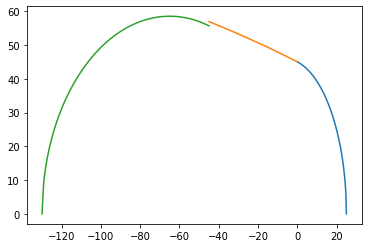

In [86]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

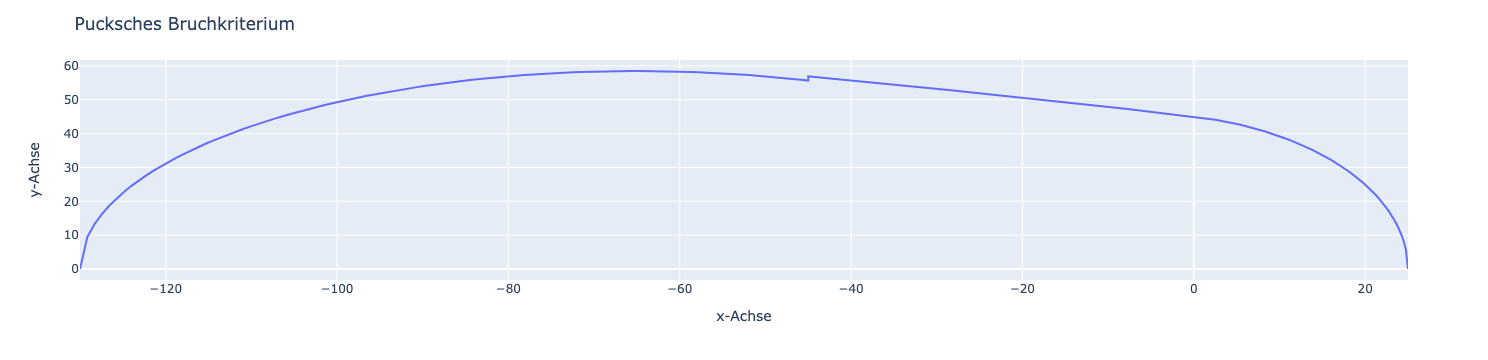

,y,x,counter
0,0.000000,-130.000000,0
1,9.476918,-129.141414,1
2,13.357760,-128.282828,2
3,16.305009,-127.424242,3
4,18.763865,-126.565657,4
...,...,...,...
95,11.582736,23.989899,295
96,10.051520,24.242424,296
97,8.223798,24.494949,297
98,5.826935,24.747475,298


In [171]:
import plotly.express as px
import pandas as pd

yx1 = {"y":y1, "x":x1}
df_yx1 = pd.DataFrame(yx1)

yx2 = {"y":y2, "x":x2}
df_yx2 = pd.DataFrame(yx2)

yx3 = {"y":y3, "x":x3}
df_yx3 = pd.DataFrame(yx3)

df_yx = pd.concat([df_yx3, df_yx2, df_yx1])

df_yx.columns = ["y", "x"]
df_yx['counter'] = range(len(df))

                  
fig = px.line(df_yx, x = "x", y = "y")

fig.update_layout(
    title="Pucksches Bruchkriterium",
    xaxis_title="x-Achse",
    yaxis_title="y-Achse",
    legend_title="Legend Title"
    )
fig.show()

df_yx